## imports

In [66]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [67]:
import numpy as np
import pandas as pd

In [68]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split

In [69]:
from fastai.structured import *
from fastai.column_data import *

In [70]:
!ls data/

fulfilment_center_info.csv
meal_info.csv
sample_submission.csv
test.csv
train.csv


In [83]:
train = pd.read_csv('data/train.csv')
meal = pd.read_csv('data/meal_info.csv')
center = pd.read_csv('data/fulfilment_center_info.csv')
test = pd.read_csv('data/test.csv')

In [7]:
train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [8]:
meal.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [9]:
center.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [10]:
test.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0


In [84]:
train.shape,test.shape,center.shape,meal.shape

((456548, 9), (32573, 8), (77, 5), (51, 3))

## preprocessing

In [85]:
train = train.merge(center, on='center_id')
train = train.merge(meal, on='meal_id')

In [86]:
test = test.merge(center, on='center_id')
test = test.merge(meal, on='meal_id')

In [87]:
train.shape,test.shape

((456548, 15), (32573, 14))

In [15]:
train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1018704,2,55,1885,135.83,152.29,0,0,323,647,56,TYPE_C,2.0,Beverages,Thai
2,1196273,3,55,1885,132.92,133.92,0,0,96,647,56,TYPE_C,2.0,Beverages,Thai
3,1116527,4,55,1885,135.86,134.86,0,0,163,647,56,TYPE_C,2.0,Beverages,Thai
4,1343872,5,55,1885,146.50,147.50,0,0,215,647,56,TYPE_C,2.0,Beverages,Thai


In [88]:
train.num_orders = np.log(train.num_orders)

In [89]:
train_cats(train)
apply_cats(test,train)

In [123]:
import os
os.makedirs('tmp', exist_ok=True)
train.to_feather('tmp/train-raw')
test.to_feather('tmp/test-raw')

In [101]:
train = pd.read_feather('tmp/train-raw')
test = pd.read_feather('tmp/test-raw')

In [76]:
import gc
gc.collect()

148

In [90]:
test['num_orders']=0

In [19]:
train.shape,test.shape

((456548, 15), (32573, 15))

In [91]:
df_raw = pd.concat([train,test])

In [296]:
df_raw.reset_index().to_feather('tmp/df-raw')

In [92]:
df_raw.drop(['base_price'],axis=1,inplace=True)

In [ ]:
df_raw.drop(['base_price'],axis=1,inplace=True)

In [184]:
13%7 

6

In [185]:
df_raw['week_no'] = df_raw.week.apply(lambda x: x%7)

In [190]:
df_raw.head()

,category,center_id,center_type,checkout_price,city_code,cuisine,emailer_for_promotion,homepage_featured,id,meal_id,num_orders,op_area,region_code,week,week_no
0,Beverages,55,TYPE_C,136.83,647,Thai,0,0,1379560,1885,5.176150,2.0,56,1,1
1,Beverages,55,TYPE_C,135.83,647,Thai,0,0,1018704,1885,5.777652,2.0,56,2,2
2,Beverages,55,TYPE_C,132.92,647,Thai,0,0,1196273,1885,4.564348,2.0,56,3,3
3,Beverages,55,TYPE_C,135.86,647,Thai,0,0,1116527,1885,5.093750,2.0,56,4,4
4,Beverages,55,TYPE_C,146.50,647,Thai,0,0,1343872,1885,5.370638,2.0,56,5,5


In [191]:
df_x, df_y, nas = proc_df(df_raw, 'num_orders')

In [24]:
df_x.drop(['cuisine_nan','center_type_nan'],axis=1,inplace=True)

In [94]:
def split_vals(a,n): return a[:n], a[n:]

In [192]:
df , test_  = split_vals(df_x,456548)
y,_ = split_vals(df_y,456548)

In [193]:
test_idx = test_.id.values

In [194]:
df.drop(['id'],axis=1,inplace=True)
test_.drop(['id'],axis=1,inplace=True)

C:\Users\USER\Anaconda2\envs\fastai-cpu\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\USER\Anaconda2\envs\fastai-cpu\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [96]:
df.shape, test_.shape

((456548, 13), (32573, 13))

In [195]:
val_idx = df.index[(df.week>135) & (df.week<146)].tolist()

In [196]:
trn_idx = df.index[(df.week<136)].tolist()

In [99]:
df.drop(['week'],axis=1,inplace=True)
test_.drop(['week'],axis=1,inplace=True)

C:\Users\USER\Anaconda2\envs\fastai-cpu\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\USER\Anaconda2\envs\fastai-cpu\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [197]:
X_train, y_train = df.iloc[trn_idx],y[trn_idx]
X_valid, y_valid = df.iloc[val_idx],y[val_idx]

In [104]:
X_train.week.unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,  18,  19,  20,
        21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,
        41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,
        61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,
        81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100,
       101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120,
       121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135], dtype=int64)

In [105]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

`Baseline`

In [33]:
reset_rf_samples()

In [90]:
m = RandomForestRegressor(n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.398093407711819, 0.56160740317758, 0.8940587744827525, 0.7676999132002272]


In [32]:
m = RandomForestRegressor(n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.2107988374960632, 0.5792925157691479, 0.9702948709271955, 0.7528392188357101]


## Experiments

In [166]:
m = RandomForestRegressor(n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.2041777474661295, 0.9209673779631921, 0.9711741935024975, 0.3208889059664829]


In [68]:
m = RandomForestRegressor(n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.21494748167094893, 0.5106850007546365, 0.9689182250234961, 0.8244698629183677]


In [69]:
m = RandomForestRegressor(n_jobs=-1,n_estimators=30)
m.fit(X_train, y_train)
print_score(m)

[0.19128036490534425, 0.4942304283300978, 0.9753860183432074, 0.8355990028469631]


In [72]:
set_rf_samples(20000)

In [73]:
m = RandomForestRegressor(n_jobs=-1,n_estimators=30)
m.fit(X_train, y_train)
print_score(m)

[0.4901282924039623, 0.5229291305356076, 0.8383928264389803, 0.8159519764041202]


In [76]:
m = RandomForestRegressor(n_jobs=-1,n_estimators=50)
m.fit(X_train, y_train)
print_score(m)

[0.48490078286904875, 0.5186327328116518, 0.8418217159377689, 0.8189638381662223]


In [77]:
m = RandomForestRegressor(n_jobs=-1,n_estimators=100)
m.fit(X_train, y_train)
print_score(m)

[0.4811789461705979, 0.5149425254344316, 0.8442405795023005, 0.8215309120265175]


In [78]:
m = RandomForestRegressor(n_jobs=-1,n_estimators=50,oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.4844171463342292, 0.517752270288468, 0.842137090336895, 0.8195779924451826, 0.8203344384608593]


In [79]:
m = RandomForestRegressor(n_jobs=-1,n_estimators=50,oob_score=True,max_features=0.5)
m.fit(X_train, y_train)
print_score(m)

[0.4819330994248829, 0.5157295603276332, 0.8437519524433911, 0.8209849530784544, 0.822076333430381]


In [80]:
m = RandomForestRegressor(n_jobs=-1,n_estimators=50,oob_score=True,max_features='sqrt')
m.fit(X_train, y_train)
print_score(m)

[0.48922886400413035, 0.5230452185611781, 0.8389854088914711, 0.815870251589125, 0.8166306994422686]


In [82]:
m = RandomForestRegressor(n_jobs=-1,n_estimators=50,oob_score=True,max_features=0.5,min_samples_leaf=3)
m.fit(X_train, y_train)
print_score(m)

[0.5010736155152125, 0.521842616306876, 0.8310943568058452, 0.8167159921776532, 0.8173741245329166]


In [83]:
m = RandomForestRegressor(n_jobs=-1,n_estimators=50,oob_score=True,max_features=0.5,min_samples_leaf=5)
m.fit(X_train, y_train)
print_score(m)

[0.5151120956439392, 0.5302061091216236, 0.8214973839846523, 0.8107939836317831, 0.8117269301543946]


In [84]:
m = RandomForestRegressor(n_jobs=-1,n_estimators=50,oob_score=True,max_features=0.8,min_samples_leaf=5)
m.fit(X_train, y_train)
print_score(m)

[0.5107440719069436, 0.5275947903106145, 0.8245118649991475, 0.8126531117369097, 0.8137760753677334]


## Model 2

In [254]:
set_rf_samples(20000)

In [256]:
m = RandomForestRegressor(n_jobs=-1,n_estimators=30,oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.4958095902322045, 0.5541357566152605, 0.8356669686385361, 0.7738398553157694, 0.8196661868273825]


In [257]:
m = RandomForestRegressor(n_jobs=-1,n_estimators=30,min_samples_leaf=3,oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.5061110635793049, 0.5569028619627127, 0.828767308588991, 0.7715755313020415, 0.8174218972249381]


In [258]:
m = RandomForestRegressor(n_jobs=-1,n_estimators=30,min_samples_leaf=3,max_features=0.5,oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.5076193082980341, 0.5530091597805036, 0.8277452182285396, 0.774758519364503, 0.8177021124645809]


In [259]:
m = RandomForestRegressor(n_jobs=-1,n_estimators=30,min_samples_leaf=3,max_features=0.8,oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.5051527853844006, 0.5519262786062188, 0.8294151237520229, 0.7756397740323675, 0.8185785961340359]


In [264]:
m = RandomForestRegressor(n_jobs=-1,n_estimators=30,min_samples_leaf=3,max_features='sqrt',oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.5275351643514369, 0.5675735187704886, 0.8139636334087592, 0.7627381170322963, 0.8054283246301656]


`after removing redundant feature`

In [275]:
m = RandomForestRegressor(n_jobs=-1,n_estimators=30,min_samples_leaf=3,max_features='sqrt',oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.5267981031839233, 0.562634194561208, 0.8144831225351166, 0.7668497044115721, 0.8062857081756444]


In [278]:
fi = rf_feat_importance(m, df.drop(['base_price'],axis=1)); fi

,cols,imp
3,checkout_price,0.234849
0,category,0.218694
5,cuisine,0.126715
9,meal_id,0.098076
10,op_area,0.067660
7,homepage_featured,0.049087
1,center_id,0.040549
12,week,0.034328
6,emailer_for_promotion,0.029082
4,city_code,0.028683


In [279]:
def plot_fi(fi): return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

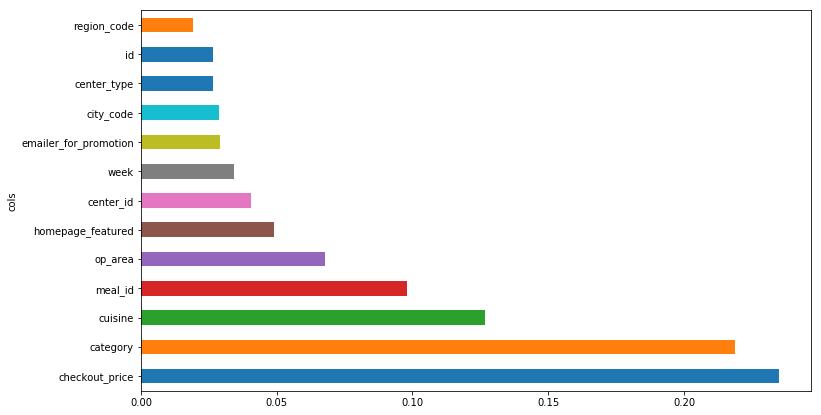

In [280]:
plot_fi(fi[:30]);

## Model 3

In [91]:
set_rf_samples(20000)

In [34]:
m = RandomForestRegressor(n_jobs=-1,n_estimators=30,min_samples_leaf=3,max_features='log2',oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.5274410695520118, 0.5605055627024343, 0.8140299929412493, 0.7686105370620321, 0.8063775734013973]


In [35]:
m = RandomForestRegressor(n_jobs=-1,n_estimators=30,min_samples_leaf=3,max_features=0.8,oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.5036996905728504, 0.5444197554087677, 0.8303951024535623, 0.7817011357936047, 0.819940770457264]


In [38]:
m = RandomForestRegressor(n_jobs=-1,n_estimators=30,min_samples_leaf=3,max_features=0.6,oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.505881607559288, 0.5463816761466113, 0.8289225372261, 0.7801249373986703, 0.8189718717476556]


In [39]:
m = RandomForestRegressor(n_jobs=-1,n_estimators=30,min_samples_leaf=3,max_features=0.5,oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.506279151961576, 0.5425539425017417, 0.8286535509270686, 0.7831948614904529, 0.8191212733073359]


In [41]:
m = RandomForestRegressor(n_jobs=-1,n_estimators=30,min_samples_leaf=3,max_features=0.5,oob_score=True,max_depth=20)
m.fit(X_train, y_train)
print_score(m)

[0.5091673958931223, 0.545435052285721, 0.8266929646533777, 0.7808861586694645, 0.8175061009183573]


In [43]:
m = RandomForestRegressor(n_jobs=-1,n_estimators=100,min_samples_leaf=3,max_features=0.5,oob_score=True,max_depth=40)
m.fit(X_train, y_train)
print_score(m)

[0.5009102490688574, 0.5370812425811871, 0.832268412878549, 0.7875465959703994, 0.822951968101334]


In [44]:
m = RandomForestRegressor(n_jobs=-1,n_estimators=200,min_samples_leaf=3,max_features=0.8,oob_score=True,max_depth=40)
m.fit(X_train, y_train)
print_score(m)

[0.5002533490231664, 0.5379033302674917, 0.8327080550692672, 0.7868957112166853, 0.8234354889965134]


In [45]:
m = RandomForestRegressor(n_jobs=-1,n_estimators=200,min_samples_leaf=3,max_features=0.8,oob_score=True,max_depth=40)
m.fit(X_train, y_train)
print_score(m)

[0.49635933353886574, 0.5367636086382501, 0.8353023485507758, 0.7877978147889207, 0.825122586622933]


In [199]:
m = RandomForestRegressor(n_jobs=-1,n_estimators=50,min_samples_leaf=7,max_features=0.5,oob_score=True,max_depth=40)
m.fit(X_train, y_train)
print_score(m)

[0.3663617155579079, 0.5120619613592569, 0.9102746442815707, 0.8068793321448363, 0.8510463349814722]


In [200]:
rf_feat_importance(m,X_train)

,cols,imp
3,checkout_price,0.302321
0,category,0.240809
5,cuisine,0.096814
9,op_area,0.082587
8,meal_id,0.047518
11,week,0.044008
1,center_id,0.034354
2,center_type,0.033653
7,homepage_featured,0.032208
6,emailer_for_promotion,0.027505


In [47]:
m = RandomForestRegressor(n_jobs=-1,n_estimators=400,min_samples_leaf=3,max_features=0.8,oob_score=True,max_depth=40)
m.fit(X_train, y_train)
print_score(m)

[0.49567763531397985, 0.5365504071581705, 0.8357544282866565, 0.7879663539158398, 0.825588895685524]


In [92]:
m = RandomForestRegressor(n_jobs=-1,n_estimators=400,min_samples_leaf=3,max_features=0.8,oob_score=True,max_depth=40)
m.fit(X_train, y_train)
print_score(m)

[0.5016642084674334, 0.5355032335662797, 0.831763100873694, 0.7887931890478131, 0.8245337866275745]


In [55]:
from rfpimp import *

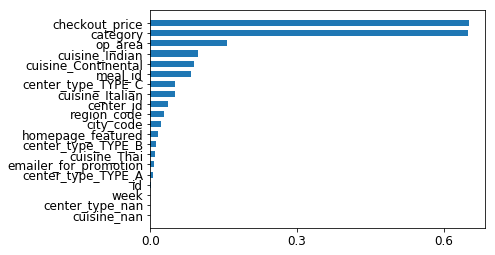

In [61]:
imp = importances(m, X_valid, pd.DataFrame(y_valid)) # permutation
viz = plot_importances(imp)

In [67]:
X_train.drop(['cuisine_nan','center_type_nan','id','week'],axis=1,inplace=True)

,category,center_id,checkout_price,city_code,emailer_for_promotion,homepage_featured,meal_id,op_area,region_code,center_type_TYPE_A,center_type_TYPE_B,center_type_TYPE_C,cuisine_Continental,cuisine_Indian,cuisine_Italian,cuisine_Thai
0,1,55,136.83,647,0,0,1885,2.0,56,0,0,1,0,0,0,1
1,1,55,135.83,647,0,0,1885,2.0,56,0,0,1,0,0,0,1
2,1,55,132.92,647,0,0,1885,2.0,56,0,0,1,0,0,0,1
3,1,55,135.86,647,0,0,1885,2.0,56,0,0,1,0,0,0,1
4,1,55,146.50,647,0,0,1885,2.0,56,0,0,1,0,0,0,1
5,1,55,146.53,647,0,0,1885,2.0,56,0,0,1,0,0,0,1
6,1,55,145.53,647,0,0,1885,2.0,56,0,0,1,0,0,0,1
7,1,55,146.53,647,0,0,1885,2.0,56,0,0,1,0,0,0,1
8,1,55,134.83,647,0,0,1885,2.0,56,0,0,1,0,0,0,1
9,1,55,144.56,647,0,0,1885,2.0,56,0,0,1,0,0,0,1


In [221]:
a = pd.read_csv('submission/sub2.csv')
b = pd.read_csv('submission/sub3.csv')
c = pd.read_csv('submission/sub4.csv')
d = pd.read_csv('submission/sub5.csv')
e = pd.read_csv('submission/sub6.csv')
f = pd.read_csv('submission/sub7.csv')
g = pd.read_csv('submission/sub8.csv')

In [222]:
z['num_orders'] = (f['num_orders'].values + g['num_orders'].values)/2

In [218]:
z = a.copy()

In [219]:
z['num_orders'] = (a['num_orders'].values + 
                   2*b['num_orders'].values +
                   c['num_orders'].values + 
                   2*d['num_orders'].values +
                   2*e['num_orders'].values +
                   3*f['num_orders'].values  )/11

In [223]:
z.to_csv('submission/sub9.csv',index=False)

In [202]:
a.head()

,id,num_orders
0,1028232,121.402717
1,1262649,113.732722
2,1453211,97.546939
3,1262599,113.553701
4,1495848,110.157453


In [203]:
b.head()

,id,num_orders
0,1028232,104.355438
1,1262649,106.713751
2,1453211,103.279946
3,1262599,105.966970
4,1495848,106.657491


## Random Search CV

In [329]:
from time import time
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

In [336]:
clf = RandomForestRegressor(n_estimators=50,oob_score=True)

In [321]:
# def report(results, n_top=3):
#     for i in range(1, n_top + 1):
#         candidates = np.flatnonzero(results['rank_test_score'] == i)
#         for candidate in candidates:
#             print("Model with rank: {0}".format(i))
#             print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
#                   results['mean_test_score'][candidate],
#                   results['std_test_score'][candidate]))
#             print("Parameters: {0}".format(results['params'][candidate]))
#             print("")

In [337]:

n_estimators = [100,500,1000]
max_features = [0.3, 0.5, 0.7, 0.9]
max_depth = [int(x) for x in np.linspace(10,110, num= 11)]
min_samples_split = [2, 5, 10]
min_samples_leaf = [2, 3, 4]


# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

pprint(random_grid)

{'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110],
 'max_features': [0.3, 0.5, 0.7, 0.9],
 'min_samples_leaf': [2, 3, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 500, 1000]}


In [338]:
rf_random = RandomizedSearchCV(estimator = clf, 
                               param_distributions = random_grid, 
                               n_iter = 20, 
                               cv = 3, 
                               verbose=2, 
                               random_state=42, 
                               n_jobs = 4)

In [ ]:
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


In [ ]:
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)

## Removing redundant feature

In [50]:
from scipy.cluster import hierarchy as hc

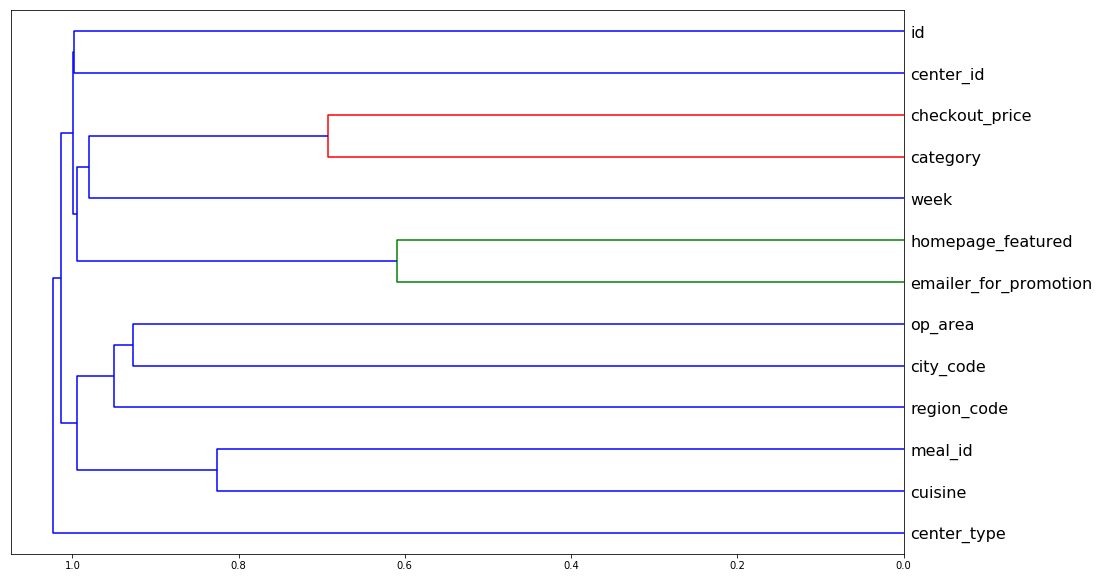

In [281]:
corr = np.round(scipy.stats.spearmanr(df.drop(['base_price'],axis=1)).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z, labels=df.drop(['base_price'],axis=1).columns, orientation='left', leaf_font_size=16)
plt.show()

In [270]:
def get_oob(df):
    m = RandomForestRegressor(n_estimators=30, min_samples_leaf=5, max_features=0.6, n_jobs=-1, oob_score=True)
    #x, _ = split_vals(df, n_trn)
    m.fit(df, y_train)
    return m.oob_score_

In [271]:
get_oob(X_train)

0.8127902756707176

In [272]:
for c in ('base_price','checkout_price'):
    print(c, get_oob(X_train.drop(c, axis=1)))

base_price 0.8138454737031062
checkout_price 0.7998422780342365


In [273]:
X_train.drop(['base_price'],axis=1,inplace=True)
X_valid.drop(['base_price'],axis=1,inplace=True)

C:\Users\USER\Anaconda2\envs\fastai-cpu\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\USER\Anaconda2\envs\fastai-cpu\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


## Extrapolation

In [ ]:
df_ext['is_valid'] = 1
df_ext.is_valid[:n_trn] = 0
x, y, nas = proc_df(df_ext, 'is_valid')

In [111]:
df.iloc[trn_idx]['is_valid'] = 0
df.iloc[val_idx]['is_valid'] = 1

C:\Users\USER\Anaconda2\envs\fastai-cpu\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [116]:
df.loc[trn_idx,'is_valid'] = 0
df.loc[val_idx,'is_valid'] = 1

C:\Users\USER\Anaconda2\envs\fastai-cpu\lib\site-packages\pandas\core\indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\USER\Anaconda2\envs\fastai-cpu\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [119]:
x, y, nas = proc_df(df, 'is_valid')

C:\Users\USER\Anaconda2\envs\fastai-cpu\lib\site-packages\fastai\structured.py:425: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df.drop(ignore_flds, axis=1, inplace=True)


In [123]:
from sklearn.ensemble import RandomForestClassifier

In [127]:
m = RandomForestClassifier(n_estimators=50, min_samples_leaf=3, max_features=0.8, n_jobs=-1, oob_score=True)
m.fit(x.drop(['week'],axis=1), y);
m.oob_score_

0.9380678482875843

In [129]:
rf_feat_importance(m,x.drop(['week'],axis=1))

,cols,imp
3,checkout_price,0.315039
8,id,0.241232
0,category,0.068661
1,center_id,0.067906
9,meal_id,0.062255
5,cuisine,0.060035
4,city_code,0.053599
10,op_area,0.051070
11,region_code,0.050133
2,center_type,0.016258


In [131]:
feats=['checkout_price', 'id','week']

In [132]:
x.drop(feats, axis=1, inplace=True)

In [133]:
m = RandomForestClassifier(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(x, y);
m.oob_score_

0.928011950550654

In [134]:
fi = rf_feat_importance(m, x); fi[:10]

,cols,imp
7,meal_id,0.233040
1,center_id,0.167966
3,city_code,0.132859
8,op_area,0.132483
0,category,0.113872
9,region_code,0.068742
4,cuisine,0.046741
2,center_type,0.039545
5,emailer_for_promotion,0.033089
6,homepage_featured,0.031663


In [143]:
len(X_train)

423727

In [137]:
len(df)

456548

In [147]:
??print_score

In [148]:
for f in feats:
    df_subs = df.drop(f, axis=1)
    X_t, X_v = X_train.drop(f, axis=1),X_valid.drop(f, axis=1)
    m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
    m.fit(X_t, y_train)
    print(f)
    print(rmse(m.predict(X_v),y_valid))

checkout_price
0.5457619388058425
id
0.5094858406191496
week
0.5235514120812866


In [149]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.5, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=3, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=-1,
           oob_score=True, random_state=None, verbose=0, warm_start=False)

In [151]:
print(rmse(m.predict(X_valid),y_valid))

0.5073479212559446


In [164]:
m = RandomForestRegressor(n_jobs=-1,n_estimators=100,min_samples_leaf=3,max_features=0.5,oob_score=True,max_depth=20)
m.fit(X_train, y_train)
print_score(m)

[0.3885076078431299, 0.5052697736710344, 0.899099323949017, 0.8119686080320525, 0.850888282350514]


In [178]:
from rfpimp import *

In [181]:
importances(m, X_valid, y_valid, n_samples=-1)

,Importance
Feature,
emailer_for_promotion,0.016762
homepage_featured,0.023836
week,0.028883
region_code,0.048672
city_code,0.048724
center_id,0.064323
center_type,0.087784
meal_id,0.152290
op_area,0.203306


In [177]:
rf_feat_importance(m,df)

,cols,imp
3,checkout_price,0.266134
0,category,0.237808
5,cuisine,0.107542
9,op_area,0.077291
8,meal_id,0.063869
11,week,0.059378
7,homepage_featured,0.039542
1,center_id,0.036832
2,center_type,0.033942
6,emailer_for_promotion,0.030260


## submission

In [117]:
reset_rf_samples()

In [283]:
m = RandomForestRegressor(n_jobs=-1,n_estimators=200,oob_score=True,max_features=0.8,min_samples_leaf=3)
m.fit(df.drop(['base_price'],axis=1), y)
print_score(m)

[0.30134110269019576, 0.29865289550312696, 0.9392967746596737, 0.9343072892095443, 0.8502855352274631]


In [91]:
m = RandomForestRegressor(n_jobs=-1,n_estimators=100,oob_score=True,max_features=0.8,min_samples_leaf=3)
m.fit(df, y)
print_score(m)

[0.29512533682575576, 0.2959224032332834, 0.9414058739666028, 0.9410612151502792, 0.8486882007378951]


In [94]:
m = RandomForestRegressor(n_jobs=-1,n_estimators=400,min_samples_leaf=3,max_features=0.8,oob_score=True,max_depth=40)
m.fit(df, y)
print_score(m)

[0.4301346931040307, 0.4081535430707387, 0.8763187215022729, 0.8773038697495521, 0.829106657729433]


In [131]:
m = RandomForestRegressor(n_jobs=-1,n_estimators=400,min_samples_leaf=3,max_features=0.8,oob_score=True,max_depth=40)
m.fit(df, y)
print_score(m)

[0.3522713669108148, 0.34112302959578283, 0.9170436357423403, 0.9142950700839912, 0.825673384354367]


In [168]:
m = RandomForestRegressor(n_jobs=-1,n_estimators=300,min_samples_leaf=3,max_features=0.5,oob_score=True,max_depth=40)
m.fit(df, y)
print_score(m)

[0.34630361839625917, 0.3399240150863714, 0.9198305176386713, 0.9148965003440597, 0.8515907114388959]


In [169]:
pred = m.predict(test_)

In [170]:
pred = np.exp(pred)

In [142]:
sub = pd.read_csv('data/sample_submission.csv')

In [171]:
pred

array([104.35544, 106.71375, 103.27995, ...,  44.07978,  44.07978,  41.82122])

In [61]:
test_.head()

,base_price,category,center_id,checkout_price,city_code,emailer_for_promotion,homepage_featured,id,meal_id,op_area,region_code,week,center_type_TYPE_A,center_type_TYPE_B,center_type_TYPE_C,cuisine_Continental,cuisine_Indian,cuisine_Italian,cuisine_Thai
0,159.11,1,55,158.11,647,0,0,1028232,1885,2.0,56,146,0,0,1,0,0,0,1
1,159.11,1,55,159.11,647,0,0,1262649,1885,2.0,56,147,0,0,1,0,0,0,1
2,158.14,1,55,157.14,647,0,0,1453211,1885,2.0,56,149,0,0,1,0,0,0,1
3,157.14,1,55,159.14,647,0,0,1262599,1885,2.0,56,150,0,0,1,0,0,0,1
4,159.11,1,55,160.11,647,0,0,1495848,1885,2.0,56,151,0,0,1,0,0,0,1


In [172]:
sub = test_.copy()

In [173]:
sub['num_orders'] = pred

In [174]:
sub['id'] = test_idx

In [175]:
sub = sub[['id','num_orders']];sub.head()

,id,num_orders
0,1028232,104.355438
1,1262649,106.713751
2,1453211,103.279946
3,1262599,105.966970
4,1495848,106.657491


In [291]:
sub = sub[['id','num_orders']];sub.head()

,id,num_orders
0,1028232,121.402717
1,1262649,113.732722
2,1453211,97.546939
3,1262599,113.553701
4,1495848,110.157453


In [159]:
os.makedirs('submission',exist_ok=True)

In [176]:
sub.to_csv('submission/sub5.csv',index=False)

## Xgboost

In [34]:
import xgboost as xgb

In [35]:
m = xgb.XGBRegressor()
m.fit(X_train,y_train)
print_score(m)

[0.6625498930625963, 0.6743086329628556, 0.7065512950774062, 0.6651107833356633]


In [36]:
m = xgb.XGBRegressor(max_depth=20,learning_rate=0.1,n_estimators=30,n_jobs=-1)
m.fit(X_train,y_train)
print_score(m)

[0.36869867742798135, 0.6501134314154746, 0.9091263064580954, 0.6887122708275706]


In [41]:
m = xgb.XGBRegressor(max_depth=3,learning_rate=0.1,n_estimators=200,n_jobs=-1)
m.fit(X_train,y_train)
print_score(m)

[0.6116453273034429, 0.6250306601701036, 0.7499111409182136, 0.7122691906745517]


In [42]:
m = xgb.XGBRegressor(max_depth=5,learning_rate=0.1,n_estimators=100,n_jobs=-1)
m.fit(X_train,y_train)
print_score(m)

[0.5707278620953365, 0.5952299423455472, 0.7822525036982176, 0.7390524261123541]


In [43]:
m = xgb.XGBRegressor(max_depth=7,learning_rate=0.1,n_estimators=100,n_jobs=-1)
m.fit(X_train,y_train)
print_score(m)

[0.5114919091259618, 0.553981171219859, 0.8251069476359484, 0.7739660199910806]


In [45]:
m = xgb.XGBRegressor(max_depth=8,learning_rate=0.1,n_estimators=100,n_jobs=-1)
m.fit(X_train,y_train)
print_score(m)

[0.4874384415116082, 0.54320810641719, 0.8411692546828884, 0.7826717371044355]


In [49]:
rf_feat_importance(m,X_train)

,cols,imp
11,week,0.146431
3,checkout_price,0.124974
0,base_price,0.119400
8,meal_id,0.115879
2,center_id,0.100205
9,op_area,0.075605
4,city_code,0.068228
1,category,0.059050
7,id,0.053518
10,region_code,0.036252


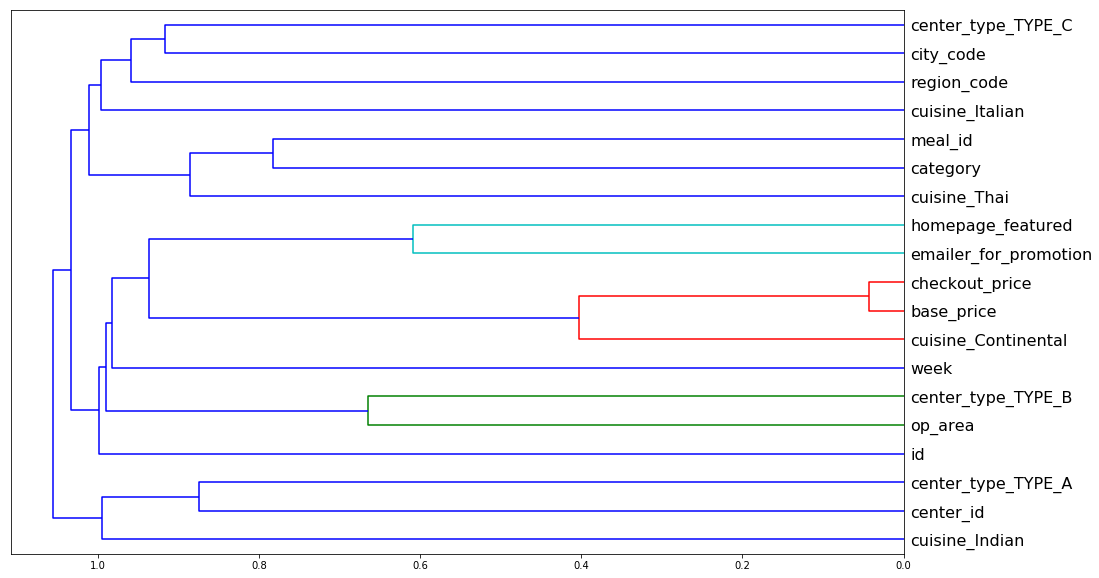

In [52]:
corr = np.round(scipy.stats.spearmanr(df).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z, labels=df.columns, orientation='left', leaf_font_size=16)
plt.show()

In [53]:
m = xgb.XGBRegressor(max_depth=7,learning_rate=0.1,n_estimators=100,n_jobs=-1,subsample=0.8,colsample_bytree=0.8)
m.fit(X_train,y_train)
print_score(m)

[0.5114025580112292, 0.5462678848325586, 0.8251680454715143, 0.7802165117249369]


In [54]:
m = xgb.XGBRegressor(max_depth=7,learning_rate=0.1,n_estimators=100,n_jobs=-1,
                     subsample=0.8,colsample_bytree=0.8,gamma=1)
m.fit(X_train,y_train)
print_score(m)

[0.5115265243212075, 0.5457456496613252, 0.8250832750737931, 0.7806365393571407]


In [56]:
m = xgb.XGBRegressor(max_depth=7,learning_rate=0.05,n_estimators=200,n_jobs=-1,
                     subsample=0.8,colsample_bytree=0.8,gamma=1)
m.fit(X_train,y_train)
print_score(m)

[0.511376727466336, 0.5473864370935122, 0.8251857062771929, 0.7793155215036978]


In [57]:
m = xgb.XGBRegressor(max_depth=7,learning_rate=0.1,n_estimators=200,n_jobs=-1,
                     subsample=0.8,colsample_bytree=0.8,gamma=1)
m.fit(df,y)
print_score(m)

[0.48466143668739003, 0.4702581639777862, 0.842973861292388, 0.8371242563003151]
